# Process Observation Data Analysis
## The aim of this analysis is to experiment with an alternative approach to analyzing process data that could potentially be more time efficient.

The data structure for the data can be seen in the image below. The observations performed vary in the level of completness as some have been observed more than others, while some have not been observed at all. And for some the sample size is large enough and variance low enough to give confidence that an average is representative of the sample.

![ERD Image](../Data/ERD.jpg)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import display
import seaborn as sns

In [4]:
data_folder = '../Data'
full_path = os.path.join(data_folder, 'ProcessData.xlsx')
excel_file_obj = pd.ExcelFile(full_path)
print('The names of the tabs or sheets in the excel file are as follows: ' ,excel_file_obj.sheet_names)

The names of the tabs or sheets in the excel file are as follows:  ['Iteration 1 Data (2)', 'Iteration 1 Data', 'Iteration 2 Tasks', 'Iteration 2 Session', 'DurationData', 'TaskData', 'RecordingData', 'ProcessData', 'HourlyRates']


From the list of sheets above it is clear that there are some additional unwanted sheets. Upon investigation it looks like the other sheets are templates that were imporoperly deleted and out of best practice we will not be dedicating resources to parsing them.

In [8]:
sheets_to_import = ['DurationData', 'TaskData', 'RecordingData', 'ProcessData', 'HourlyRates']
select_sheets = pd.read_excel(full_path, sheet_name=sheets_to_import)

In [9]:
display(select_sheets['DurationData'].sample(n=10))

,DurationID,RecordingID,TaskID,StartTime,EndTime,Duration
283,284,80,5122500.0,00:36:30,00:37:08,0 days 00:00:38
517,519,30,5371200.0,01:42:17,01:43:36,0 days 00:01:19
32,33,20,5121100.0,02:04:28,02:04:28,0 days 00:00:00
322,323,80,5223800.0,03:21:04,03:21:10,0 days 00:00:06
250,251,71,522200.0,01:46:45,01:47:08,0 days 00:00:23
154,155,71,5122200.0,01:16:26,01:16:28,0 days 00:00:02
307,308,80,5213800.0,02:06:28,02:06:36,0 days 00:00:08
189,190,50,5122500.0,01:27:58,01:28:50,0 days 00:00:52
11,12,11,5121400.0,00:06:13,00:06:17,0 days 00:00:04
279,280,80,521600.0,00:30:44,00:30:53,0 days 00:00:09


For the DurationData table:
1. The TaskID needs to be fixed and the .0 needs to be removed
2. The Duration needs to be fixed, and the days need to be removed, or recalculate the Duration

In [13]:
select_sheets['DurationData']['TaskID'] = select_sheets['DurationData']['TaskID'].fillna(0).replace([float('inf'), float('-inf')], 0).astype(int)
display(select_sheets['DurationData'].sample(n=10))

,DurationID,RecordingID,TaskID,StartTime,EndTime,Duration
35,36,20,5122500,02:06:48,02:08:10,0 days 00:01:22
117,118,51,5121100,00:16:31,00:16:35,0 days 00:00:04
135,136,51,5121500,01:58:06,01:59:25,0 days 00:01:19
183,184,50,5122400,01:10:54,01:11:55,0 days 00:01:01
356,357,140,5371600,00:06:34,00:06:39,0 days 00:00:05
382,383,190,45500,00:04:03,00:04:50,0 days 00:00:47
407,408,120,5322500,00:53:53,01:01:34,0 days 00:07:41
287,288,80,5122500,00:40:07,00:40:31,0 days 00:00:24
220,221,90,5122500,03:36:03,03:36:10,0 days 00:00:07
348,349,180,5385500,01:25:04,01:40:14,0 days 00:15:10


In [15]:
from datetime import datetime

In [17]:
select_sheets['DurationData']['StartTime'] = pd.to_datetime(select_sheets['DurationData']['StartTime'], format = '%H:%M:%S')
select_sheets['DurationData']['EndTime'] = pd.to_datetime(select_sheets['DurationData']['EndTime'], format = '%H:%M:%S')

select_sheets['DurationData'].loc[:,'Duration 2'] = select_sheets['DurationData']['EndTime'] - select_sheets['DurationData']['StartTime']

display(select_sheets['DurationData'].sample(n=10))

,DurationID,RecordingID,TaskID,StartTime,EndTime,Duration,Duration 2
454,456,130,413200,1900-01-01 01:37:20,1900-01-01 01:41:03,0 days 00:03:43,0 days 00:03:43
477,479,130,413200,1900-01-01 02:34:37,1900-01-01 02:35:22,0 days 00:00:45,0 days 00:00:45
359,360,141,5372300,1900-01-01 00:06:21,1900-01-01 00:10:48,0 days 00:04:27,0 days 00:04:27
508,510,30,521600,1900-01-01 01:26:50,1900-01-01 01:27:27,0 days 00:00:37,0 days 00:00:37
208,209,90,5122400,1900-01-01 02:00:24,1900-01-01 02:00:47,0 days 00:00:23,0 days 00:00:23
10,11,11,5121200,1900-01-01 00:05:52,1900-01-01 00:06:13,0 days 00:00:21,0 days 00:00:21
111,112,61,5121200,1900-01-01 03:02:50,1900-01-01 03:02:57,0 days 00:00:07,0 days 00:00:07
22,23,20,5123300,1900-01-01 00:28:44,1900-01-01 00:29:02,0 days 00:00:18,0 days 00:00:18
211,212,90,5121500,1900-01-01 02:05:59,1900-01-01 02:06:03,0 days 00:00:04,0 days 00:00:04
226,227,10,5213800,1900-01-01 00:42:11,1900-01-01 00:42:11,0 days 00:00:00,0 days 00:00:00


In [19]:
def format_timedelta(td):
    total_seconds = int(td.total_seconds())
    hours, remainder = divmod(total_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return f"{hours:02}:{minutes:02}:{seconds:02}"

select_sheets['DurationData'].loc[:,'Duration 3'] = select_sheets['DurationData']['Duration 2'].apply(format_timedelta)

display(select_sheets['DurationData'].sample(n=10))

,DurationID,RecordingID,TaskID,StartTime,EndTime,Duration,Duration 2,Duration 3
475,477,130,413200,1900-01-01 02:30:48,1900-01-01 02:33:51,0 days 00:03:03,0 days 00:03:03,00:03:03
384,385,190,45500,1900-01-01 00:06:20,1900-01-01 00:06:58,0 days 00:00:38,0 days 00:00:38,00:00:38
15,16,11,5121200,1900-01-01 00:14:03,1900-01-01 00:14:26,0 days 00:00:23,0 days 00:00:23,00:00:23
169,170,71,5122400,1900-01-01 01:54:51,1900-01-01 01:56:01,0 days 00:01:10,0 days 00:01:10,00:01:10
41,42,20,5122100,1900-01-01 02:24:37,1900-01-01 02:24:50,0 days 00:00:13,0 days 00:00:13,00:00:13
420,422,130,413100,1900-01-01 00:24:45,1900-01-01 00:28:19,0 days 00:03:34,0 days 00:03:34,00:03:34
19,20,20,5121100,1900-01-01 00:25:03,1900-01-01 00:25:21,0 days 00:00:18,0 days 00:00:18,00:00:18
269,270,81,5322300,1900-01-01 00:20:16,1900-01-01 00:40:26,0 days 00:20:10,0 days 00:20:10,00:20:10
109,110,61,5121100,1900-01-01 03:02:33,1900-01-01 03:02:43,0 days 00:00:10,0 days 00:00:10,00:00:10
117,118,51,5121100,1900-01-01 00:16:31,1900-01-01 00:16:35,0 days 00:00:04,0 days 00:00:04,00:00:04


To get the Duration in the right format we had to:
1. Convert the start and end time to datetime (datetime.datetime)
2. Calculate the difference (timedelta object)
3. Convert the start and end time to datetime.time to remove the year
4. Format the timedelta to remove the day count

In [22]:
select_sheets['DurationData']['StartTime'] = select_sheets['DurationData']['StartTime'].dt.time
select_sheets['DurationData']['EndTime'] = select_sheets['DurationData']['EndTime'].dt.time
display(select_sheets['DurationData'].sample(n=10))

,DurationID,RecordingID,TaskID,StartTime,EndTime,Duration,Duration 2,Duration 3
379,380,200,43122500,00:13:57,00:14:05,0 days 00:00:08,0 days 00:00:08,00:00:08
513,515,30,5371600,01:34:23,01:34:33,0 days 00:00:10,0 days 00:00:10,00:00:10
213,214,90,5122200,02:22:02,02:22:04,0 days 00:00:02,0 days 00:00:02,00:00:02
271,272,81,5322400,00:44:29,00:48:16,0 days 00:03:47,0 days 00:03:47,00:03:47
370,371,200,43122500,00:10:26,00:10:43,0 days 00:00:17,0 days 00:00:17,00:00:17
466,468,130,413200,02:07:41,02:08:37,0 days 00:00:56,0 days 00:00:56,00:00:56
435,437,130,413200,00:59:34,01:00:37,0 days 00:01:03,0 days 00:01:03,00:01:03
405,406,120,5322400,00:31:01,00:31:51,0 days 00:00:50,0 days 00:00:50,00:00:50
80,81,91,5122400,01:03:45,01:04:48,0 days 00:01:03,0 days 00:01:03,00:01:03
318,319,80,5122500,03:13:19,03:15:39,0 days 00:02:20,0 days 00:02:20,00:02:20


In [24]:
display(select_sheets['TaskData'].sample(n=10))

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime
146,5223800,Complete auth,522,Pre-authorization Agent,4,00:00:18.500000
106,521200,Validate membership,521,Pre-authorization Agent,9,00:01:23.111000
67,5371200,Create authorisation,5371,Case Manager,1,00:03:11
58,5322300,Update report and add new cases,5322,Case manager,0,NaN
72,415100,Receive claim,415,Claims Assessor,0,NaN
64,5324400,Issue weekly report via email,5324,Case manager,0,NaN
99,451000,Share check list with Team Leader,45,Claims Manager,0,NaN
194,5385300,Review BI report,5385,Case manager,0,NaN
230,43122300,Download payrun report,43122,BSS Technical Specialist,4,00:00:26.750000
20,532500,Manage high cost report,532,Case manager,0,NaN


For the TaskData table:
1. We need to know up front how many processes we actually observed, then remove all processes that were not observed at least once
2. We need to know the number of iterations observed for each task, as well as how many people were observed. (Group and individualized views)
3. We need all measures of central tendency and either a box plot or scatter plot to get an idea of how times are distributed for each TaskID.
4. Find a relationship between number of iterations or people observed, and how data is distributed (looking at the mean as a proportion of the standard deviation)

In [27]:
display(select_sheets['RecordingData'])

,RecordingID,Recording Length,RecordingDate,PersonObserved,RecordingStatus
0,10.0,00:46:42,28/08/2024,Pauline Jordaan,Processed and Reviewed
1,11.0,00:29:04,28/08/2024,Pauline Jordaan,Processed and Reviewed
2,20.0,03:21:07,28/08/2024,Siyethemba Mkhize,Processed and Reviewed
3,30.0,03:03:36,29/08/2024,Jaqueline Wessels,Processed and Reviewed
4,40.0,00:42:28,02/09/2024,Zoleka Baba,Processed and Reviewed
...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN


For the RecordingData table:
1. The data type for Recording ID needs to be fixed
2. The extra rows need to be removed

In [34]:
print(select_sheets['TaskData'].dtypes)

TaskID              int64
TaskName           object
ProcessID           int64
ResponsibleRole    object
Iterations          int64
AverageTaskTime    object
dtype: object


In [46]:
observedProcesses = select_sheets['TaskData'][select_sheets['TaskData']['Iterations'] > 0]
percentage0bserved = (observedProcesses.shape[0] / select_sheets['TaskData'].shape[0]) * 100
print(f"Out of {select_sheets['TaskData'].shape[0]} total tasks {observedProcesses.shape[0]} have been observed at least once making this {percentage0bserved}%")

Out of 251 total tasks 81 have been observed at least once making this 32.27091633466135%


In [50]:
groupedIterations = select_sheets['TaskData'].groupby('Iterations').size()
dfGroupedIterations = groupedIterations.reset_index(name='Number of Tasks')
display(dfGroupedIterations)

,Iterations,Number of Tasks
0,0,170
1,1,29
2,2,8
3,3,9
4,4,12
5,5,3
6,6,2
7,7,1
8,9,4
9,10,2


In [52]:
print(dfGroupedIterations.dtypes)

Iterations         int64
Number of Tasks    int64
dtype: object


In [68]:
def categorizeNoTasks(x):
    if x==0:
        return '0'
    elif x==1:
        return '1'
    elif x>1 and x<=5:
        return '2-5'
    elif x>5 and x<=15:
        return '6-15'
    else:
        return '15+'

dfGroupedIterations.loc[:,'Categorized Task Count'] = dfGroupedIterations['Iterations'].apply(categorizeNoTasks)

display(dfGroupedIterations)

groupedIterationTasks = dfGroupedIterations.groupby('Categorized Task Count')['Number of Tasks'].sum().reset_index()

display(groupedIterationTasks)

,Iterations,Number of Tasks,Categorized Task Count
0,0,170,0
1,1,29,1
2,2,8,2-5
3,3,9,2-5
4,4,12,2-5
5,5,3,2-5
6,6,2,6-15
7,7,1,6-15
8,9,4,6-15
9,10,2,6-15


,Categorized Task Count,Number of Tasks
0,0,170
1,1,29
2,15+,8
3,2-5,32
4,6-15,12


In [70]:
print(groupedIterationTasks.dtypes)

Categorized Task Count    object
Number of Tasks            int64
dtype: object


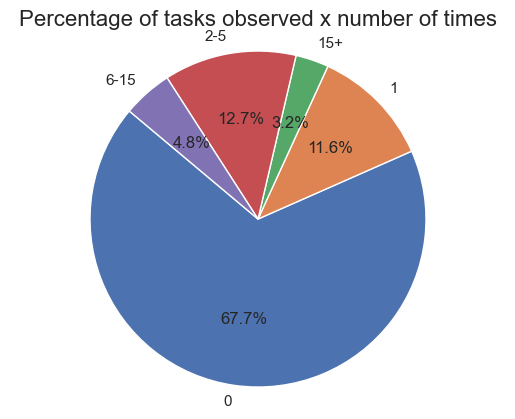

In [96]:
sns.set()

plt.pie(groupedIterationTasks['Number of Tasks'], labels=groupedIterationTasks['Categorized Task Count'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Percentage of tasks observed x number of times', fontsize=16)
plt.savefig('../Exports/PercentageTasksXIterations-PieChart.png', format='png', dpi=300)
plt.show()